# Fake News Classification - EDA

# Imports and Constants

In [152]:
import os
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from re import search

In [2]:
DATA_PATH = '../data/'
# if the path or names of the data hosted on Kaggle changes the following 
# three constants will need updated
DATA_ARCHIVE = 'fake-and-real-news-dataset.zip'
FAKE_DATA_FILE = 'Fake.csv'
TRUE_DATA_FILE = 'True.csv'
KAGGLE_DATA_LOCATION = 'clmentbisaillon/fake-and-real-news-dataset'

# Download the Data

In [3]:
try: 
    os.mkdir(DATA_PATH)
except FileExistsError:
    print('Data directory already exists')
    pass

Data directory already exists


Documentation on the Kaggle API is located at [https://www.kaggle.com/docs/api](https://www.kaggle.com/docs/api)

In [4]:
# assumes that kaggle has been installed and an api key is correctly installed
if not os.path.exists(DATA_PATH + DATA_ARCHIVE):
    !kaggle datasets download -d $KAGGLE_DATA_LOCATION -p $DATA_PATH

In [5]:
if not os.path.exists(DATA_PATH + FAKE_DATA_FILE):
    with zipfile.ZipFile(DATA_PATH + DATA_ARCHIVE, 'r') as zip_ref:
        zip_ref.extractall(path=DATA_PATH)

In [6]:
os.listdir('../data')

['fake-and-real-news-dataset.zip', 'Fake.csv', 'True.csv']

# Load the Data

In [7]:
fake_df = pd.read_csv(DATA_PATH + FAKE_DATA_FILE)

In [8]:
fake_df.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [9]:
true_df = pd.read_csv(DATA_PATH + TRUE_DATA_FILE)

In [10]:
true_df.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [11]:
true_df['label'] = 'true'

In [12]:
fake_df['label'] = 'fake'

In [13]:
df = pd.concat([fake_df, true_df], ignore_index=True)

In [14]:
df.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake


# Clean the Data

## Check for missing data

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  object
dtypes: object(5)
memory usage: 1.7+ MB


There are no null values, next I will check for any placeholder values.

## Check for placeholder values and duplicates

### Title column

In [16]:
title_value_counts = df.title.value_counts()

In [17]:
title_value_counts[title_value_counts > 1]

Factbox: Trump fills top jobs for his administration                                                                                         14
Factbox: Contenders for senior jobs in Trump's administration                                                                                 8
Highlights: The Trump presidency on April 13 at 9:30 P.M. EDT/0130 GMT on Friday                                                              8
MEDIA IGNORES Time That Bill Clinton FIRED His FBI Director On Day Before Vince Foster Was Found Dead                                         6
Factbox: International reaction to arrest of Reuters reporters in Myanmar                                                                     6
                                                                                                                                             ..
TRUMP WAS RIGHT About CNN Being “Very Fake News”: Federal Judge Rules Against CNN In “FAKE NEWS” Case…May Have Acted With “Actual Malice

There are a lot of titles that are used more than once.  This will need to be reviewed.
First I will look at the most commonly reused title.

In [18]:
df[df.title == 'Factbox: Trump fills top jobs for his administration']

,title,text,subject,date,label
29701,Factbox: Trump fills top jobs for his administ...,(Reuters) - U.S. President-elect Donald Trump ...,politicsNews,"January 19, 2017",true
29875,Factbox: Trump fills top jobs for his administ...,(Reuters) - U.S. President-elect Donald Trump ...,politicsNews,"January 11, 2017",true
30096,Factbox: Trump fills top jobs for his administ...,(Reuters) - U.S. President-elect Donald Trump ...,politicsNews,"December 21, 2016",true
30118,Factbox: Trump fills top jobs for his administ...,(Reuters) - President-elect Donald Trump will ...,politicsNews,"December 19, 2016",true
30136,Factbox: Trump fills top jobs for his administ...,(Reuters) - President-elect Donald Trump will ...,politicsNews,"December 17, 2016",true
30167,Factbox: Trump fills top jobs for his administ...,(Reuters) - U.S. President-elect Donald Trump ...,politicsNews,"December 15, 2016",true
30186,Factbox: Trump fills top jobs for his administ...,(Reuters) - U.S. President-elect Donald Trump ...,politicsNews,"December 13, 2016",true
30220,Factbox: Trump fills top jobs for his administ...,(Reuters) - U.S. President-elect Donald Trump ...,politicsNews,"December 13, 2016",true
30236,Factbox: Trump fills top jobs for his administ...,(Reuters) - U.S. President-elect Donald Trump ...,politicsNews,"December 12, 2016",true
30289,Factbox: Trump fills top jobs for his administ...,(Reuters) - U.S. President-elect Donald Trump ...,politicsNews,"December 8, 2016",true


In [19]:
df.iloc[29701].text

'(Reuters) - U.S. President-elect Donald Trump will name former Georgia Governor Sonny Perdue as his nominee for secretary of agriculture on Thursday, a senior transition official said on Wednesday. Here is a list of Republican Trump’s selections for top jobs in his administration.  NOTE: Senate confirmation is required for all the posts except national security adviser and White House posts. Tillerson, 64, has spent his entire career at Exxon Mobil Corp, where he rose to chairman and chief executive officer in 2006. A civil engineer by training, the Texan joined the world’s largest publicly traded energy company in 1975 and led several of its operations in the United States as well as in Yemen, Thailand and Russia. As Exxon’s chief executive, he maintained close ties with Moscow and opposed U.S. sanctions against Russia for its incursion into Crimea. Mnuchin, 54, is a successful private equity investor, hedge fund manager and Hollywood financier who spent 17 years at Goldman Sachs Gro

In [20]:
df.iloc[29875].text

'(Reuters) - U.S. President-elect Donald Trump on Wednesday announced he has chosen David Shulkin, who currently heads the Department of Veterans Affairs healthcare system, to head the agency. Here is a list of Republican Trump’s selections for top jobs in his administration.  NOTE: Senate confirmation is required for all the posts except national security adviser and White House posts. Tillerson, 64, has spent his entire career at Exxon Mobil Corp, where he rose to chairman and chief executive officer in 2006. A civil engineer by training, the Texan joined the world’s largest publicly traded energy company in 1975 and led several of its operations in the United States as well as in Yemen, Thailand and Russia. As Exxon’s chief executive, he maintained close ties with Moscow and opposed U.S. sanctions against Russia for its incursion into Crimea. Mnuchin, 54, is a successful private equity investor, hedge fund manager and Hollywood financier who spent 17 years at Goldman Sachs Group Inc

This title seems to be a story title that Reuters reused, while changing the underlying story.

Next I'll make a dataframe with all the data with duplicate titles

In [21]:
duplicate_title_list = set(title_value_counts[title_value_counts > 1].keys())

In [22]:
df_dup_titles = df[df.title.isin(duplicate_title_list)]

In [23]:
df_dup_titles

,title,text,subject,date,label
1488,McConnell Says He’ll Obstruct ANY Effort To H...,Siding with Trump s Attorney General Jeff Sess...,News,"May 12, 2017",fake
1535,McConnell Says He’ll Obstruct ANY Effort To H...,Siding with Trump s Attorney General Jeff Sess...,News,"May 10, 2017",fake
9087,BARBRA STREISAND Gives Up On Dream Of Impeachi...,Barbra Streisand was an Obama sycophant and on...,politics,"Dec 31, 2017",fake
9088,WATCH: SENATOR LINDSEY GRAHAM DROPS BOMBSHELL…...,Everyone suspected the sketchy Steele Dossier ...,politics,"Dec 31, 2017",fake
9089,“CONSERVATIVE GAY GUY” BLASTS Pence’s Aspen Ne...,It s been said that good fences make good neig...,politics,"Dec 30, 2017",fake
...,...,...,...,...,...
44884,U.S. puts more pressure on Pakistan to help wi...,WASHINGTON (Reuters) - The United States sugge...,worldnews,"August 21, 2017",true
44886,Trump talks tough on Pakistan's 'terrorist' ha...,ISLAMABAD (Reuters) - Outlining a new strategy...,worldnews,"August 22, 2017",true
44887,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",true
44889,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",true


Looking at the above subset of data, I can see that some rows may be complete duplicates (44887 and 44889) and others may be duplicates except for the date (1488 and 1535).

Are there any duplicate rows?

In [24]:
df_dup_titles[df_dup_titles.duplicated()]

,title,text,subject,date,label
9942,HILLARY TWEETS MESSAGE In Defense Of DACA…OOPS...,No time to waste we've got to fight with eve...,politics,"Sep 9, 2017",fake
11446,FORMER DEMOCRAT WARNS Young Americans: “Rioter...,"Who is silencing political speech, physically...",politics,"Mar 10, 2017",fake
14925,[VIDEO] #BlackLivesMatter Terrorists Storm Dar...,They were probably just looking for a safe sp...,politics,"Nov 16, 2015",fake
23926,Senate tax bill stalls on deficit-focused 'tri...,WASHINGTON (Reuters) - The U.S. Senate on Thur...,politicsNews,"November 30, 2017",true
24259,Trump warns 'rogue regime' North Korea of grav...,BEIJING (Reuters) - U.S. President Donald Trum...,politicsNews,"November 8, 2017",true
...,...,...,...,...,...
44709,France unveils labor reforms in first step to ...,PARIS (Reuters) - French President Emmanuel Ma...,worldnews,"August 31, 2017",true
44744,Guatemala top court sides with U.N. graft unit...,GUATEMALA CITY (Reuters) - Guatemala s top cou...,worldnews,"August 29, 2017",true
44771,"Europeans, Africans agree renewed push to tack...",PARIS (Reuters) - Europe s big four continen...,worldnews,"August 28, 2017",true
44834,Thailand's ousted PM Yingluck has fled abroad:...,BANGKOK (Reuters) - Ousted Thai prime minister...,worldnews,"August 25, 2017",true


There are 209 duplicate rows that will need to be deleted.

I want to also check for other duplicate situations.

Check for rows with duplicate text

In [25]:
df_dup_titles[df_dup_titles.duplicated(['text'])]

,title,text,subject,date,label
9114,WHY THIS BLUE-COLLAR DEMOCRAT STRONGHOLD Count...,AP News The regulars amble in before dawn and...,politics,"Dec 27, 2017",fake
9738,LEFTIST STORE OWNER Makes Video Asking Libs To...,Things didn t go as well as Nicholle had hoped...,politics,"Oct 6, 2017",fake
9942,HILLARY TWEETS MESSAGE In Defense Of DACA…OOPS...,No time to waste we've got to fight with eve...,politics,"Sep 9, 2017",fake
11041,Joe Scarborough BERATES Mika Brzezinski Over “...,,politics,"Apr 26, 2017",fake
11190,WATCH TUCKER CARLSON Scorch Sanctuary City May...,,politics,"Apr 6, 2017",fake
...,...,...,...,...,...
44709,France unveils labor reforms in first step to ...,PARIS (Reuters) - French President Emmanuel Ma...,worldnews,"August 31, 2017",true
44744,Guatemala top court sides with U.N. graft unit...,GUATEMALA CITY (Reuters) - Guatemala s top cou...,worldnews,"August 29, 2017",true
44771,"Europeans, Africans agree renewed push to tack...",PARIS (Reuters) - Europe s big four continen...,worldnews,"August 28, 2017",true
44834,Thailand's ousted PM Yingluck has fled abroad:...,BANGKOK (Reuters) - Ousted Thai prime minister...,worldnews,"August 25, 2017",true


There are 5964 rows that have duplicate text.

I see some rows do not have any text, and that will have to be investigated later. 

Check for rows that have duplicate title and text

In [26]:
df_dup_titles[df_dup_titles.duplicated(['title', 'text'])]

,title,text,subject,date,label
9942,HILLARY TWEETS MESSAGE In Defense Of DACA…OOPS...,No time to waste we've got to fight with eve...,politics,"Sep 9, 2017",fake
11446,FORMER DEMOCRAT WARNS Young Americans: “Rioter...,"Who is silencing political speech, physically...",politics,"Mar 10, 2017",fake
14925,[VIDEO] #BlackLivesMatter Terrorists Storm Dar...,They were probably just looking for a safe sp...,politics,"Nov 16, 2015",fake
15892,HOUSE INTEL Slaps Subpoenas on McCain Institut...,Please see our previous report below on the Mc...,Government News,"Dec 27, 2017",fake
15893,PRICELESS! WATCH MSNBC HOST’S Shocked Response...,THIS IS PRICELESS! The video below shows just ...,Government News,"Dec 26, 2017",fake
...,...,...,...,...,...
44709,France unveils labor reforms in first step to ...,PARIS (Reuters) - French President Emmanuel Ma...,worldnews,"August 31, 2017",true
44744,Guatemala top court sides with U.N. graft unit...,GUATEMALA CITY (Reuters) - Guatemala s top cou...,worldnews,"August 29, 2017",true
44771,"Europeans, Africans agree renewed push to tack...",PARIS (Reuters) - Europe s big four continen...,worldnews,"August 28, 2017",true
44834,Thailand's ousted PM Yingluck has fled abroad:...,BANGKOK (Reuters) - Ousted Thai prime minister...,worldnews,"August 25, 2017",true


Only 5793 rows with duplicate title and text.

Of the 171 rows that have duplicate text but not title, how many have empty text values

In [27]:
df_dup_titles[df_dup_titles.text == ' ']

,title,text,subject,date,label
10923,TAKE OUR POLL: Who Do You Think President Trum...,,politics,"May 10, 2017",fake
11041,Joe Scarborough BERATES Mika Brzezinski Over “...,,politics,"Apr 26, 2017",fake
11190,WATCH TUCKER CARLSON Scorch Sanctuary City May...,,politics,"Apr 6, 2017",fake
11236,SHOCKER: Public School Turns Computer Lab Into...,,politics,"Apr 1, 2017",fake
11247,MICHAEL FLYNN’S LAWYER Releases Statement Scor...,,politics,"Mar 30, 2017",fake
...,...,...,...,...,...
21816,BALTIMORE BURNS: MARYLAND GOVERNOR BRINGS IN N...,,left-news,"Apr 27, 2015",fake
21826,FULL VIDEO: THE BLOCKBUSTER INVESTIGATION INTO...,,left-news,"Apr 25, 2015",fake
21827,(VIDEO) HILLARY CLINTON: RELIGIOUS BELIEFS MUS...,,left-news,"Apr 25, 2015",fake
21857,(VIDEO)ICE PROTECTING OBAMA: WON’T RELEASE NAM...,,left-news,"Apr 14, 2015",fake


There are more rows with a text value of ' ' than 171, so this issue will need to be dealt with separately.

*Summary for title column* There are close to 11,800 rows that have titles used multiple times.  The use of a duplicate title seems to be a common practice and some articles seem to be revisions.  A duplicate title will be considered ok, but the duplicate rows and rows with duplicate text for the story will need removed.  Rows without text will also need to be removed.

### text column

Check for a text value with one space

In [28]:
df[df.text == ' ']

,title,text,subject,date,label
10923,TAKE OUR POLL: Who Do You Think President Trum...,,politics,"May 10, 2017",fake
11041,Joe Scarborough BERATES Mika Brzezinski Over “...,,politics,"Apr 26, 2017",fake
11190,WATCH TUCKER CARLSON Scorch Sanctuary City May...,,politics,"Apr 6, 2017",fake
11225,MAYOR OF SANCTUARY CITY: Trump Trying To Make ...,,politics,"Apr 2, 2017",fake
11236,SHOCKER: Public School Turns Computer Lab Into...,,politics,"Apr 1, 2017",fake
...,...,...,...,...,...
21826,FULL VIDEO: THE BLOCKBUSTER INVESTIGATION INTO...,,left-news,"Apr 25, 2015",fake
21827,(VIDEO) HILLARY CLINTON: RELIGIOUS BELIEFS MUS...,,left-news,"Apr 25, 2015",fake
21857,(VIDEO)ICE PROTECTING OBAMA: WON’T RELEASE NAM...,,left-news,"Apr 14, 2015",fake
21873,(VIDEO) HYSTERICAL SNL TAKE ON HILLARY’S ANNOU...,,left-news,"Apr 12, 2015",fake


There could be an arbritray amount of whitespace so I will replace all text values that are only whitespace with Nan

In [29]:
df = df.replace(r'^\s*$', np.nan, regex=True)

In [30]:
df.isna().sum()

title        0
text       631
subject      0
date         0
label        0
dtype: int64

*Summary for the text column* 631 rows with no text is small compared to the size of the dataset, so they should be dropped.

### Remove Duplicate Data

In [41]:
len(df)

44898

Drop Duplicate Rows (keeping the first instance)

In [31]:
df_clean = df.drop_duplicates(ignore_index=True)

In [32]:
len(df_clean)

44689

Drop Rows with No Text (just a title)

In [33]:
df_clean = df_clean.dropna()

In [34]:
len(df_clean)

44058

Drop Rows with same title and text (keeping the first instance)

In [35]:
df_clean = df_clean.drop_duplicates(['title', 'text'], ignore_index=True)

In [36]:
len(df_clean)

38658

Drop Rows with the same text (keeping the first instance)

In [37]:
df_clean = df_clean.drop_duplicates(['text'], ignore_index=True)

In [38]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38644 entries, 0 to 38643
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    38644 non-null  object
 1   text     38644 non-null  object
 2   subject  38644 non-null  object
 3   date     38644 non-null  object
 4   label    38644 non-null  object
dtypes: object(5)
memory usage: 1.5+ MB


How many rows were dropped?

In [39]:
len(df) - len(df_clean)

6254

## Check Date Range

### Check date field for a valid format

In [40]:
try:
    df_clean['date'] = pd.to_datetime(df_clean['date'])
except ValueError:
    print('Not all date values are dates.')

Not all date values are dates.


### Filter instances with invalid dates

I will need to filter out the date values that are not dates.

In [43]:
def not_a_date(string):
    """
    Check if the input string can be converted to a date.
    
    Return:
    True if it is not a date
    False if it is a date
    """
    try:
        date = pd.to_datetime(string)
        return False
    except ValueError:
        return True

In [44]:
df_bad_dates = df_clean[df_clean['date'].apply(not_a_date)]

In [45]:
df_bad_dates

,title,text,subject,date,label
9357,https://100percentfedup.com/served-roy-moore-v...,https://100percentfedup.com/served-roy-moore-v...,politics,https://100percentfedup.com/served-roy-moore-v...,fake
15119,https://100percentfedup.com/video-hillary-aske...,https://100percentfedup.com/video-hillary-aske...,politics,https://100percentfedup.com/video-hillary-aske...,fake
15120,https://100percentfedup.com/12-yr-old-black-co...,https://100percentfedup.com/12-yr-old-black-co...,politics,https://100percentfedup.com/12-yr-old-black-co...,fake
15422,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,politics,https://fedup.wpengine.com/wp-content/uploads/...,fake
15423,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,politics,https://fedup.wpengine.com/wp-content/uploads/...,fake
16126,Homepage,[vc_row][vc_column width= 1/1 ][td_block_trend...,left-news,MSNBC HOST Rudely Assumes Steel Worker Would N...,fake


The instances with text in the date field are all invalid data and will be dropped

### Drop Instances with invalid dates

In [ ]:
df_clean = df_clean.drop(df_bad_dates.index)

### Convert dates to datetime type

In [48]:
try:
    df_clean['date'] = pd.to_datetime(df_clean['date'])
except ValueError:
    print('Not all date values are dates.')

### Check Date Range

In [49]:
df_clean.date.describe()

count                   38638
unique                   1010
top       2017-12-06 00:00:00
freq                      177
first     2015-03-31 00:00:00
last      2018-02-19 00:00:00
Name: date, dtype: object

The description of the data, indicated that it was between 2016 and 2017.  I will need to check the data that is outside it.

In [52]:
df_early = df_clean[df_clean.date < pd.to_datetime('2016-01-01')]
df_early

,title,text,subject,date,label
14343,EVERY U.S. CITIZEN TAKEN HOSTAGE IN IRAN To Be...,Just another slap in the face to US citizens. ...,politics,2015-12-31,fake
14344,WATCH FUNNIEST MAN In American Politics Ridicu...,You don t want to miss this!Here s a little in...,politics,2015-12-31,fake
14345,"FBI POSTS $5,000 REWARD For Person Who Committ...","Americans were warned by Attorney General, Lor...",politics,2015-12-31,fake
14346,SWISS ARMY CHIEF WARNS CITIZENS About Explosiv...,Wouldn t it be great if we had someone in gove...,politics,2015-12-31,fake
14347,WOW! Sarah Palin’s Stunning AZ Vacation Home G...,"It would be great if her former running mate,...",politics,2015-12-30,fake
...,...,...,...,...,...
16665,BREAKING: [Video] COLORADO BAKER WHO REFUSED T...,"About 2,000 of the emails I got were of suppo...",left-news,2015-04-07,fake
16666,(VIDEO) PATRIOTS DEMAND REMOVAL OF COMMUNIST FLAG,Patriots removed the the Chinese flag between ...,left-news,2015-04-06,fake
16667,BUSTED: [VIDEO] MAN ATTEMPTS TO TAPE “GOTCHA” ...,The Michael Brown and Eric Garner cases have o...,left-news,2015-04-05,fake
16668,[VIDEO] 16 YR OLD ARRESTED For Violent Gang Be...,This is a sad commentary on a generation who h...,left-news,2015-04-04,fake


In [53]:
df_early.label.value_counts()

fake    1597
Name: label, dtype: int64

In [54]:
df_late = df_clean[df_clean.date > pd.to_datetime('2017-12-31')]

In [55]:
df_late

,title,text,subject,date,label
9050,Democrat Senator Warns Mueller Not To Release ...,"According to The Hill, Democrat Senator Bob Ca...",politics,2018-02-19,fake
9051,MSNBC ANCHOR Flabbergasted at What Texas Teach...,If we protect every other government building ...,politics,2018-02-19,fake
9052,WATCH: SNOWFLAKES ASKED Communist Party Platfo...,Ami Horowitz is fantastic! Check out this man ...,politics,2018-02-19,fake
9053,JUST IN: BADASS GENERAL JOHN KELLY Shoved Chin...,Just one more reminder of why President Trump ...,politics,2018-02-18,fake
9054,DOJ’s JEFF SESSIONS Opens Investigation Into W...,Thank goodnesss Jeff Sessions is moving on fin...,politics,2018-02-18,fake
9055,WATCH: ’’Carpetbagger” Mitt Romney Takes Swipe...,The GOP presidential candidate who couldn t se...,politics,2018-02-18,fake
9056,GOTCHA! A Stammering John Podesta Stunned by a...,John Podesta is Hillary Clinton s former campa...,politics,2018-02-18,fake
9057,HIGH SCHOOL TEACHER Makes “Shooting At Trump” ...,EAG News A Wyoming high school is under fire ...,politics,2018-02-18,fake
9058,IT BEGINS…RINO MEGA-DONOR Threatens Jeb Bush: ...,A longtime Republican Party donor based in Flo...,politics,2018-02-18,fake
9059,BUSTED! Maxine Waters’ Ties to Black Nationali...,We reported that Maxine Waters and members of ...,politics,2018-02-18,fake


In [56]:
df_clean.label.value_counts()

true    21191
fake    17447
Name: label, dtype: int64

### Summary

All the instances outside the 2016 to 2017 range are labeled Fake.  Given that they look similar to the data in that range, and that the number of instances labeled fake has already been reduced because of duplicate data, I will not remove them.

# Explore the dataset

## Helper Functions

In [148]:
def show_hist_for_col(df, column, title):
    """
    Display a histogram for a column in a dataframe, splitting the data by label.
    """
    plt.figure(figsize=(16,8))
    df[df.label == 'true'][column].hist(label='True')
    df[df.label == 'fake'][column].hist(alpha=0.4, label='Fake')
    plt.title(title)
    plt.legend()
    plt.show()

## Distribution of Labels

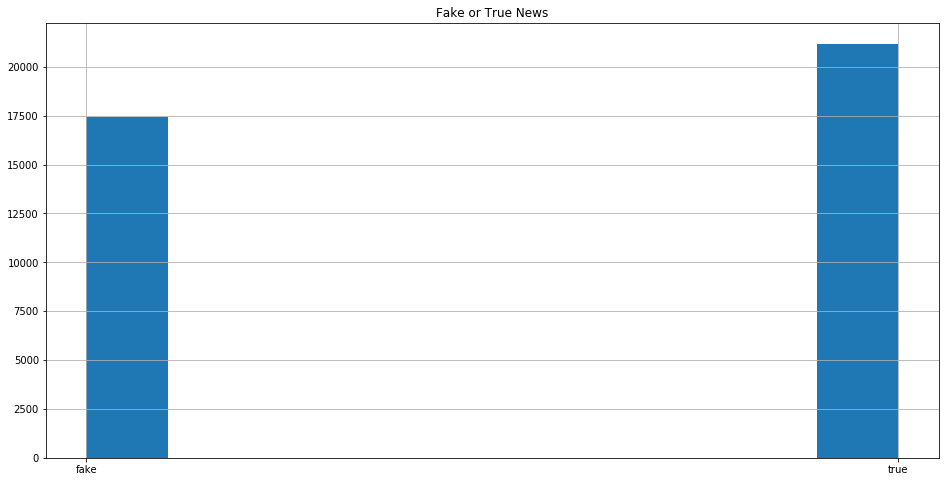

In [71]:
plt.figure(figsize=(16,8))
df_clean.label.hist()
plt.title('Fake or True News')
plt.show()

After cleaning the data it has become more imbalanced, but it is not significant so hopefully it will not have a major impact on models.

## Distribution of News Over Time

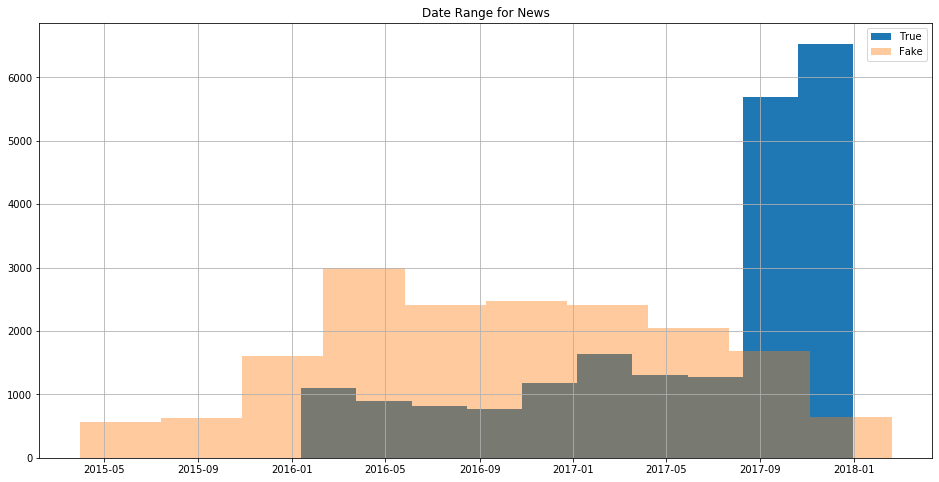

In [133]:
show_hist_for_col(df_clean, 'date', 'Date Range for News')

There is a more even distribution of News across the time frame for Fake vs. True.  Given that the "news" in the dataset does not evenly cover the same events make give the classification models some trouble, or overfit to the dataset.

## Length of Titles

In [72]:
df_clean['title_len'] = df_clean.title.apply(len)

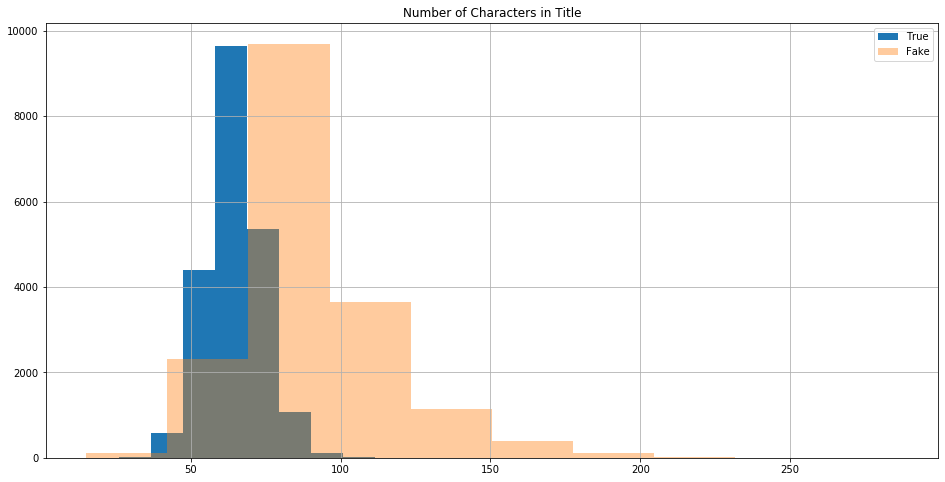

In [134]:
show_hist_for_col(df_clean, 'title_len', 'Number of Characters in Title')

In [83]:
df_clean[df_clean.label == 'true'].title_len.describe()

count    21191.000000
mean        64.660233
std          9.159722
min         26.000000
25%         59.000000
50%         64.000000
75%         70.000000
max        133.000000
Name: title_len, dtype: float64

In [84]:
df_clean[df_clean.label == 'fake'].title_len.describe()

count    17447.000000
mean        91.217000
std         24.505484
min         15.000000
25%         77.000000
50%         88.000000
75%        100.000000
max        286.000000
Name: title_len, dtype: float64

Fake news stories have a wider range in the length of title than True, and those Fake news titles have a higher median & mean than True ones.

The first quartile for Fake news is longer in length than the 3rd quartile for true news.  Just labeling the news according to length of title would give better than random classification results.

## Length of Text

In [85]:
df_clean['text_len'] = df_clean.text.apply(len)

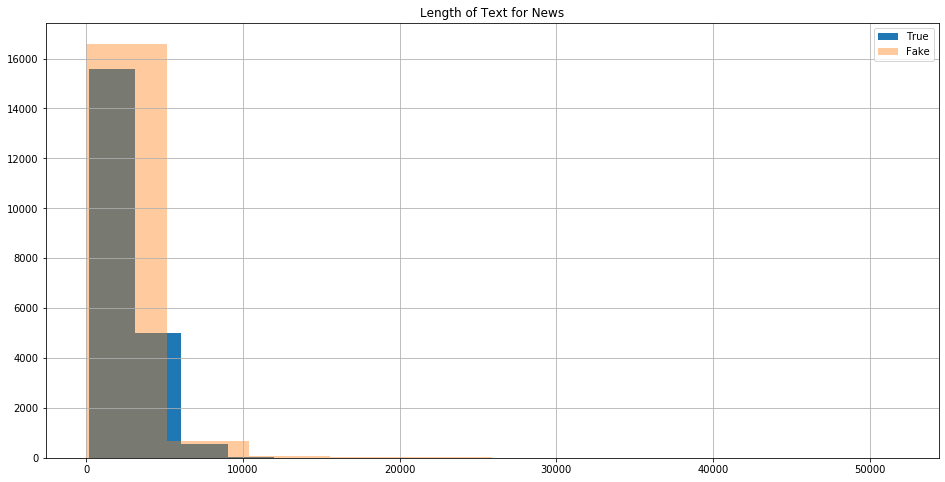

In [135]:
show_hist_for_col(df_clean, 'text_len', 'Length of Text for News')

There are some really long news stories (over 10K characters). Let's see what they are about.

In [88]:
df_long = df_clean[df_clean.text_len > 10000]

In [89]:
df_long

,title,text,subject,date,label,title_len,text_len
2639,Trump’s List Of ‘Unreported Terror Attacks’ A...,"In another of Donald Trump s whine rests, the ...",News,2017-02-07,fake,90,13095
4147,Here’s The Master List Of Reasons Why Trump W...,We know Trump is a sexual predator. We know he...,News,2016-10-18,fake,90,15211
4475,Here You Go: Every Bat Sh*t Crazy Thing That ...,Donald Trump spent Monday night making a total...,News,2016-09-27,fake,91,20264
7715,Fed Up Republicans Threaten Third Party Optio...,I ve been saying for a long time now that the ...,News,2016-03-03,fake,71,26734
8111,The Top Ten Reasons We NEED A Liberal Supreme...,"One way or another, the passing of Supreme Cou...",News,2016-02-14,fake,52,10120
...,...,...,...,...,...,...,...
28649,President Obama's final State of the Union add...,(Reuters) - President Barack Obama knocked Rep...,politicsNews,2016-01-13,true,50,15363
30759,The thinking behind Kim Jong Un's 'madness',SEOUL (Reuters) - On an icy December day in 20...,worldnews,2017-11-30,true,43,11405
31043,Special Report: 'Treacherous shenanigans' - Th...,HARARE (Reuters) - Inside State House in Harar...,worldnews,2017-11-26,true,81,14775
32027,Special Report: How a defrocked judge became t...,"CARACAS (Reuters) - Last March, Chief Justice ...",worldnews,2017-11-15,true,92,17999


What is the longest news story?

In [90]:
df_long[df_long.text_len == df_long.text_len.max()]

,title,text,subject,date,label,title_len,text_len
17053,MEDIA TRIPWIRE? Ping Pong Pizza Conspiracy Pro...,Funny how secrets travel. I d start to believ...,US_News,2016-12-28,fake,98,51794


In [102]:
longest_text = df_long[df_long.text_len == df_long.text_len.max()]['text'].iloc[0]

In [103]:
longest_text

' Funny how secrets travel. I d start to believe, if I were to bleed.    Lyrics written by David Bowie from the album OutsideShawn Helton 21st Century Wire In the days before the US presidential election in November 2016, Wikileaks revealed a new string of emails connected to Hillary Clinton s 2016 campaign chairman, John Podesta. Online interpretations of the leaked Podesta email exchanges subsequently led to a digital firestorm on social media, producing an intense conspiratorial  open source investigation  still in search of its smoking gun. However, the phenomenon now known by its hashtag #Pizzagate has since set a number of tertiary events into motion. Is there a real story hidden amongst the debris of this online explosion?Is it possible that  open source investigators  were being led into a virtual cul-de-sac and thus missing the real story?More importantly, could people be playing into the hands of the very establishment they seek to depose?Let s investigate   SHOCK & AWE    Ov

It looks like an actual news story, not invalid data.  I think it will be safe to assume they are all ok to keep in the dataset.

In [104]:
df_clean[df_clean.label == 'true'].text_len.describe()

count    21191.000000
mean      2378.527158
std       1683.781664
min        152.000000
25%        906.500000
50%       2216.000000
75%       3226.500000
max      29781.000000
Name: text_len, dtype: float64

In [105]:
df_clean[df_clean.label == 'fake'].text_len.describe()

count    17447.000000
mean      2550.912936
std       2201.223680
min          5.000000
25%       1650.000000
50%       2235.000000
75%       3006.000000
max      51794.000000
Name: text_len, dtype: float64

What's the news story that is only 5 characters?

In [107]:
df_clean[df_clean.text_len == df_clean.text_len.min()]

,title,text,subject,date,label,title_len,text_len
12095,DEAR DEMOCRATS AND LIBERALS…Stop Complaining A...,Ouch!,politics,2016-11-21,fake,96,5


It's just one word, but I think it should be kept.

The bulk of the Fake and True news stories are about the same length, when looking at the 2nd and 3rd quartile values, but the fake news stories have a higher max and and significantly higher 1st quartile value.

## Capital Letters in Title

In [108]:
df_clean['caps_in_title'] = df_clean['title'].apply(lambda title: sum(1 for char in title if char.isupper()))

In [109]:
df_clean

,title,text,subject,date,label,title_len,text_len,caps_in_title
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,2017-12-31,fake,79,2893,11
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,2017-12-31,fake,69,1898,8
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,2017-12-30,fake,90,3597,15
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,2017-12-29,fake,78,2774,19
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,2017-12-25,fake,70,2346,11
...,...,...,...,...,...,...,...,...
38639,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,2017-08-22,true,61,2821,8
38640,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,2017-08-22,true,52,800,3
38641,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,2017-08-22,true,49,1950,1
38642,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,2017-08-22,true,61,1199,4


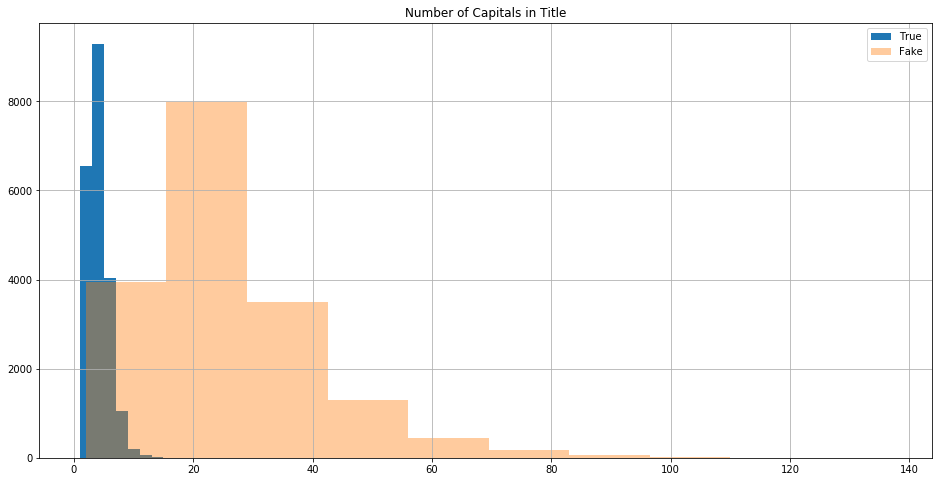

In [136]:
show_hist_for_col(df_clean, 'caps_in_title', 'Number of Capitals in Title')

In [113]:
df_clean[df_clean.label == 'true'].caps_in_title.describe()

count    21191.000000
mean         3.546128
std          1.783526
min          1.000000
25%          2.000000
50%          3.000000
75%          5.000000
max         21.000000
Name: caps_in_title, dtype: float64

In [114]:
df_clean[df_clean.label == 'fake'].caps_in_title.describe()

count    17447.000000
mean        25.689689
std         13.982261
min          2.000000
25%         16.000000
50%         22.000000
75%         32.000000
max        137.000000
Name: caps_in_title, dtype: float64

There are considerably more capitals in Fake news compared to True. The Fake news instances tended to have longer titles so maybe that is part of it.  I'll normalize the counts and check again.

In [115]:
df_clean['norm_caps_in_title'] = df_clean['caps_in_title'] / df_clean['title_len']

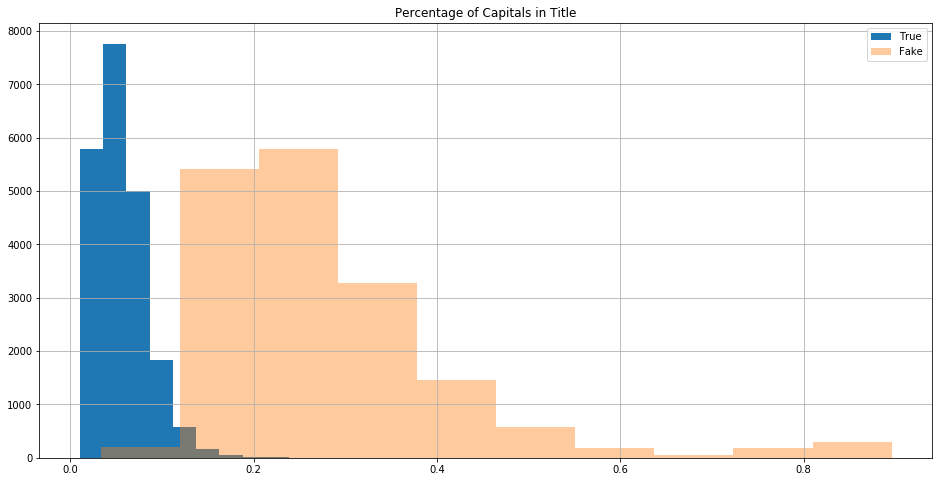

In [137]:
show_hist_for_col(df_clean, 'norm_caps_in_title', 'Percentage of Capitals in Title')

There is even less overlap when considering the percentage of capitals in the news title for Fake news compared to True.  Just looking at this metric would give considerably better for classification than random, and is a good candidate for a baseline model.

## Capitals in Text

In [124]:
df_clean['caps_in_text'] = df_clean['text'].apply(lambda text: sum(1 for char in text if char.isupper()))

In [125]:
df_clean['norm_caps_in_text'] = df_clean['caps_in_text'] / df_clean['text_len']

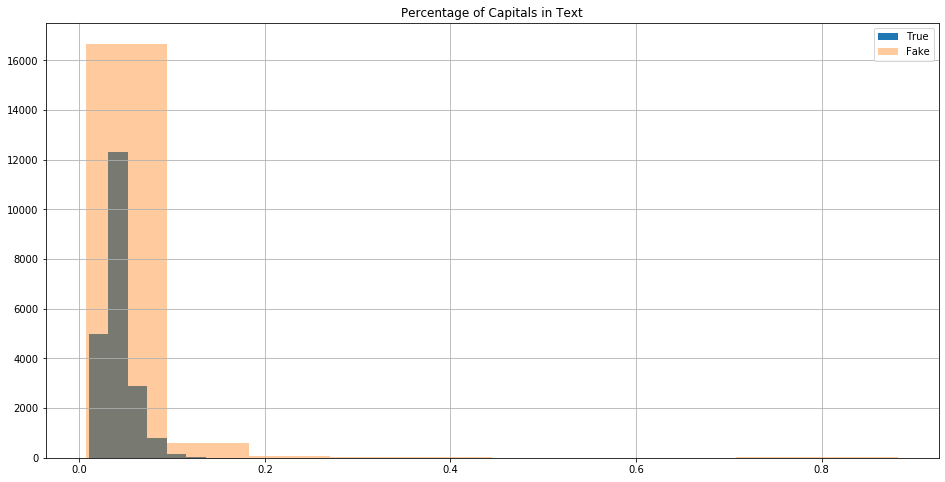

In [138]:
show_hist_for_col(df_clean, 'norm_caps_in_text', 'Percentage of Capitals in Text')

In [127]:
df_clean[df_clean.label == 'true'].norm_caps_in_text.describe()

count    21191.000000
mean         0.041764
std          0.015244
min          0.010239
25%          0.031744
50%          0.038193
75%          0.047673
max          0.220690
Name: norm_caps_in_text, dtype: float64

In [128]:
df_clean[df_clean.label == 'fake'].norm_caps_in_text.describe()

count    17447.000000
mean         0.045016
std          0.044842
min          0.007538
25%          0.029395
50%          0.036131
75%          0.047068
max          0.882353
Name: norm_caps_in_text, dtype: float64

As opposed to the title, there in a great deal of overlap for the percentage of capitals in the text of Fake vs. True news.

## News Organizations Mentioned in Text

### Reuters

All the *True* news stories are from Reuters, how many of those stories as well as the ones labeled *Fake* contain the string *Reuters*?

In [142]:
def check_string_for(substring, fullstring):
    """Check if the substring is in the fullstring"""
    if search(substring, fullstring):
        return True
    else:
        return False

In [143]:
df_reuters = df_clean[df_clean.text.apply(lambda news_text: check_string_for('Reuters', news_text))]

In [147]:
df_reuters.label.value_counts()

true    21154
fake      215
Name: label, dtype: int64

In [146]:
df_reuters.iloc[0]['text']

'Republicans should be downright afraid to try killing Obamacare ever again.As we all know, Donald Trump has been urging Republicans in Congress to pass legislation that would strip healthcare from over 20 million Americans.Not only do Trump and his Republican allies want to kill Obamacare, they want to end Medicaid as we know it. Indeed, Medicaid would become a death panel where the state would decide what kind of healthcare people get.As Trump s effort to kill Obamacare gets more desperate, the landmark healthcare program gets more popular, enough so, that a few Republicans have broken ranks to oppose repeal.In fact, Medicaid expansion is so popular that Maine voters overruled Governor Paul LePage s veto on Tuesday via the ballot.According to Reuters,Tuesday s ballot asked Maine voters to approve or reject a plan to provide healthcare coverageunder Medicaid for adults under the age of 65 with incomes at or below 138 percent of the federal poverty level, which in 2017 is about $16,000

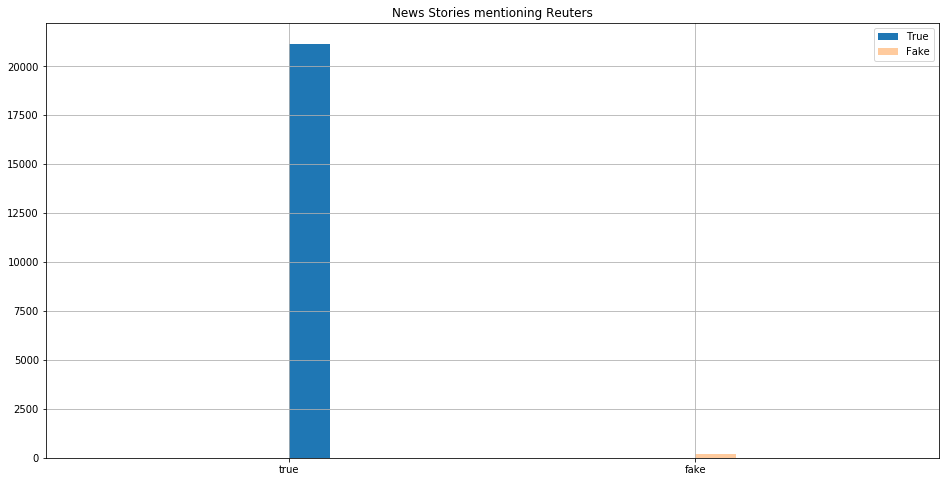

In [151]:
show_hist_for_col(df_reuters, 'label', "News Stories mentioning Reuters")

I only checked for *Reuters* with a capital R.  Most but not all of the *True* stories include that string, plus 215 of the *Fake* stories reference it.

Since the *True* stories I've inspected all contain the text *(Reuters)* and the dataset creators say they collected all the *True* data from Reuters, I'd like to see what the text for the *True* stories is like when they don't contain that text.

In [155]:
df_clean_true = df_clean[df_clean.label == 'true']
df_true_not_reuters_paren = df_clean_true[df_clean_true.text.apply(lambda news_text: not check_string_for('(Reuters)', news_text))]

In [156]:
df_true_not_reuters_paren

,title,text,subject,date,label,title_len,text_len,caps_in_title,norm_caps_in_title,caps_in_text,norm_caps_in_text
17556,Democratic U.S. senator seeks audit of EPA chi...,WASHINGTON () - The top Democrat on the Senate...,politicsNews,2017-12-18,true,66,2029,7,0.106061,113,0.055692
17878,Factbox: Republicans to watch in U.S. Senate t...,WASHINGTON - Some key U.S. senators still had ...,politicsNews,2017-11-30,true,59,3993,5,0.084746,91,0.022790
18587,GAO opens door for Congress to review leverage...,NEW YORK (IFR) - The investigative arm of Cong...,politicsNews,2017-10-19,true,55,1798,4,0.072727,63,0.035039
20925,White House unveils list of ex-lobbyists grant...,The White House on Wednesday disclosed a group...,politicsNews,2017-06-01,true,63,3369,2,0.031746,111,0.032947
21784,Factbox: Trump Supreme Court appointee to affe...,"Neil Gorsuch, President Donald Trump’s appoint...",politicsNews,2017-04-07,true,62,2706,4,0.064516,86,0.031781
22778,Trump's defense chief visits UAE in first Midd...,ABU DHABI - U.S. President Donald Trump’s defe...,politicsNews,2017-02-18,true,58,1363,6,0.103448,87,0.063830
23197,Trump Supreme Court nominee Gorsuch seen in th...,"Federal appeals court judge Neil Gorsuch, the ...",politicsNews,2017-02-01,true,62,5869,5,0.080645,204,0.034759
23234,Kushner divests equity in major NYC property,NEW YORK (IFR) - Jared Kushner has divested hi...,politicsNews,2017-01-31,true,44,1999,4,0.090909,84,0.042021
24236,Commentary: Trump can't fight Islamic State wi...,Over the course of the U.S. presidential campa...,politicsNews,2016-12-07,true,75,6880,5,0.066667,294,0.042733
24774,Tough reality check for Trump's pledge of bett...,"CHARLOTTE, North Carolina - Donald Trump’s pro...",politicsNews,2016-11-10,true,70,4741,2,0.028571,99,0.020882


Interestingly there are a couple stories with the *True* label that are from **IFR** even though the dataset creators said all the *True* stories are from **Reuters**.  The stories without a news source look to follow the standard format of a **Reuters** news story.